In [1]:
import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Discount_price = []
original_price = []
Discount = []
Brand = []
Camera = []
ratings = []
pixels=[]
Wifi_connectivity=[]
for i in range (1,21):
    url=f"https://www.flipkart.com/search?q=cameras&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page={i}"
    print (url)
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Referer': 'https://www.justdial.com/',
    'Connection': 'keep-alive'
    }
    
    response = requests.get(url,headers = headers)
    print(response)
    
    Soup =BeautifulSoup(response.text)
    for i in Soup.find_all("div",class_="col col-5-12 BfVC2z"):
        if re.findall(r"(₹\d.*)₹\d.*%",i.text):
            Discount_price.append("".join(re.findall(r"(₹\d.*)₹\d.*%",i.text)))
        else:
            Discount_price.append(np.nan)

        if re.findall(r"₹\d.*₹(\d.*)\d{2}?%",i.text):
            original_price.append("".join(re.findall(r"₹\d.*₹(\d.*)\d{2}?%",i.text)))
        else:
            original_price.append(np.nan)

        if re.findall(r"₹\d.*₹\d.*(\d{2}?)%",i.text):
            Discount.append("".join(re.findall(r"₹\d.*₹\d.*(\d{2}?)%",i.text)))
        else:
            Discount.append(np.nan)
            
    for i in Soup.find_all("div",class_="KzDlHZ"):
        if re.findall(r"(^\w+)",i.text):
            Brand.append("".join(re.findall(r"(^\w+)",i.text)))
        else:
            Brand.append(np.nan)
    for i in Soup.find_all("div",class_= 'yKfJKb row'):
        if (i.find('span', class_='Y1HWO0')):
            ratings.append(i.find('span', class_='Y1HWO0').text)
        else:
            ratings.append(np.nan)
            
   
    for i in Soup.find_all("div",class_="KzDlHZ"):
        if re.findall(r"\s\w+\sCamera\s",i.text):
            Camera.append("".join(re.findall(r"\w+\sCamera",i.text)))
        else:
            Camera.append(np.nan)
        
       
    for i in Soup.find_all("div",class_= 'yKfJKb row'):
        if re.findall(r"Pixels:\s(\d+)",i.text):
            pixels.append("".join(re.findall(r"Pixels:\s(\d+)",i.text)))
        else:
            pixels.append(np.nan)
    for i in Soup.find_all("div",class_= 'yKfJKb row'):
        if re.findall(r"WiFi\s",i.text):
            Wifi_connectivity.append("".join(re.findall(r"WiFi\s",i.text)))
        else:
            Wifi_connectivity.append(np.nan)

https://www.flipkart.com/search?q=cameras&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=1
<Response [200]>
https://www.flipkart.com/search?q=cameras&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=2
<Response [200]>
https://www.flipkart.com/search?q=cameras&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=3
<Response [200]>
https://www.flipkart.com/search?q=cameras&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=4
<Response [200]>
https://www.flipkart.com/search?q=cameras&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=5
<Response [200]>
https://www.flipkart.com/search?q=cameras&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY&page=6
<Response [200]>
https://www.flipkart.c

In [3]:
data = pd.DataFrame({
    "Brand":Brand,
    "Original_price":original_price,
    "Discount_price":Discount_price,
    "Camera":Camera,
    "Pixels":pixels,
    "WiFi Connectivity":Wifi_connectivity,
    "Discount":Discount,
    "Ratings":ratings
    })

In [4]:
data

,Brand,Original_price,Discount_price,Camera,Pixels,WiFi Connectivity,Discount,Ratings
0,Canon,"1,19,995","₹95,190",Mirrorless Camera,24,WiFi,20,4.6
1,Canon,"64,995","₹45,990",Mirrorless Camera,24,WiFi,29,4.4
2,GoPro,"54,500","₹22,984",NaN,23,NaN,57,4.2
3,Insta360,"51,999","₹34,990",Action CameraAction Camera,72,NaN,32,4.4
4,Canon,"35,99","₹34,990",DSLR Camera,18,WiFi,52,4.4
...,...,...,...,...,...,...,...,...
475,FUJIFILM,"10,999","₹9,499",NaN,NaN,NaN,13,4.4
476,RHONNIUM,"2,500","₹1,250",NaN,12,NaN,50,3.7
477,Plastikraft,"19,999","₹11,999",NaN,NaN,NaN,40,NaN
478,TOTAL,"19,999","₹6,999",NaN,44,NaN,65,NaN


In [5]:
data["WiFi Connectivity"].unique()

array(['WiFi ', nan], dtype=object)

In [6]:
data['WiFi Connectivity'] = data['WiFi Connectivity'].fillna('No')

In [7]:
data['WiFi Connectivity'] =data['WiFi Connectivity'].apply(lambda x: "Yes" if x == 'WiFi ' else x)

In [8]:
data

,Brand,Original_price,Discount_price,Camera,Pixels,WiFi Connectivity,Discount,Ratings
0,Canon,"1,19,995","₹95,190",Mirrorless Camera,24,Yes,20,4.6
1,Canon,"64,995","₹45,990",Mirrorless Camera,24,Yes,29,4.4
2,GoPro,"54,500","₹22,984",NaN,23,No,57,4.2
3,Insta360,"51,999","₹34,990",Action CameraAction Camera,72,No,32,4.4
4,Canon,"35,99","₹34,990",DSLR Camera,18,Yes,52,4.4
...,...,...,...,...,...,...,...,...
475,FUJIFILM,"10,999","₹9,499",NaN,NaN,No,13,4.4
476,RHONNIUM,"2,500","₹1,250",NaN,12,No,50,3.7
477,Plastikraft,"19,999","₹11,999",NaN,NaN,No,40,NaN
478,TOTAL,"19,999","₹6,999",NaN,44,No,65,NaN


In [9]:

#Save the DataFrame to a CSV file
data.to_csv(r'C:\Users\laksh\Downloads\project\data.csv')

In [10]:
#import the csv file 
data1=pd.read_csv(r'C:\Users\laksh\Downloads\project\data.csv')
data1

,Unnamed: 0,Brand,Original_price,Discount_price,Camera,Pixels,WiFi Connectivity,Discount,Ratings
0,0,Canon,"1,19,995","₹95,190",Mirrorless Camera,24.0,Yes,20.0,4.6
1,1,Canon,"64,995","₹45,990",Mirrorless Camera,24.0,Yes,29.0,4.4
2,2,GoPro,"54,500","₹22,984",NaN,23.0,No,57.0,4.2
3,3,Insta360,"51,999","₹34,990",Action CameraAction Camera,72.0,No,32.0,4.4
4,4,Canon,"35,99","₹34,990",DSLR Camera,18.0,Yes,52.0,4.4
...,...,...,...,...,...,...,...,...,...
475,475,FUJIFILM,"10,999","₹9,499",NaN,NaN,No,13.0,4.4
476,476,RHONNIUM,"2,500","₹1,250",NaN,12.0,No,50.0,3.7
477,477,Plastikraft,"19,999","₹11,999",NaN,NaN,No,40.0,NaN
478,478,TOTAL,"19,999","₹6,999",NaN,44.0,No,65.0,NaN


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         480 non-null    int64  
 1   Brand              480 non-null    object 
 2   Original_price     474 non-null    object 
 3   Discount_price     474 non-null    object 
 4   Camera             326 non-null    object 
 5   Pixels             334 non-null    float64
 6   WiFi Connectivity  480 non-null    object 
 7   Discount           474 non-null    float64
 8   Ratings            331 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 33.9+ KB


In [12]:
data.columns

Index(['Brand', 'Original_price', 'Discount_price', 'Camera', 'Pixels',
       'WiFi Connectivity', 'Discount', 'Ratings'],
      dtype='object')

In [13]:
#drop the 'unnamed' column
data1.drop(columns=['Unnamed: 0'],errors='ignore')

,Brand,Original_price,Discount_price,Camera,Pixels,WiFi Connectivity,Discount,Ratings
0,Canon,"1,19,995","₹95,190",Mirrorless Camera,24.0,Yes,20.0,4.6
1,Canon,"64,995","₹45,990",Mirrorless Camera,24.0,Yes,29.0,4.4
2,GoPro,"54,500","₹22,984",NaN,23.0,No,57.0,4.2
3,Insta360,"51,999","₹34,990",Action CameraAction Camera,72.0,No,32.0,4.4
4,Canon,"35,99","₹34,990",DSLR Camera,18.0,Yes,52.0,4.4
...,...,...,...,...,...,...,...,...
475,FUJIFILM,"10,999","₹9,499",NaN,NaN,No,13.0,4.4
476,RHONNIUM,"2,500","₹1,250",NaN,12.0,No,50.0,3.7
477,Plastikraft,"19,999","₹11,999",NaN,NaN,No,40.0,NaN
478,TOTAL,"19,999","₹6,999",NaN,44.0,No,65.0,NaN


In [14]:
data1

,Unnamed: 0,Brand,Original_price,Discount_price,Camera,Pixels,WiFi Connectivity,Discount,Ratings
0,0,Canon,"1,19,995","₹95,190",Mirrorless Camera,24.0,Yes,20.0,4.6
1,1,Canon,"64,995","₹45,990",Mirrorless Camera,24.0,Yes,29.0,4.4
2,2,GoPro,"54,500","₹22,984",NaN,23.0,No,57.0,4.2
3,3,Insta360,"51,999","₹34,990",Action CameraAction Camera,72.0,No,32.0,4.4
4,4,Canon,"35,99","₹34,990",DSLR Camera,18.0,Yes,52.0,4.4
...,...,...,...,...,...,...,...,...,...
475,475,FUJIFILM,"10,999","₹9,499",NaN,NaN,No,13.0,4.4
476,476,RHONNIUM,"2,500","₹1,250",NaN,12.0,No,50.0,3.7
477,477,Plastikraft,"19,999","₹11,999",NaN,NaN,No,40.0,NaN
478,478,TOTAL,"19,999","₹6,999",NaN,44.0,No,65.0,NaN


In [15]:
#checking for missing values
data1.isna().sum()

Unnamed: 0             0
Brand                  0
Original_price         6
Discount_price         6
Camera               154
Pixels               146
WiFi Connectivity      0
Discount               6
Ratings              149
dtype: int64

In [16]:
((((data1.isna().sum().sort_values(ascending = False))/len(data1))*100).astype(str) + "%").head(30)

Camera               32.083333333333336%
Ratings              31.041666666666668%
Pixels               30.416666666666664%
Original_price                     1.25%
Discount_price                     1.25%
Discount                           1.25%
Unnamed: 0                          0.0%
Brand                               0.0%
WiFi Connectivity                   0.0%
dtype: object

In [17]:
#fill the missing values in Camera
data1['Camera']=data1['Camera'].fillna('Action Camera')

In [18]:
# fill the missing values in pixels
data1['Pixels']=data1['Pixels'].fillna('1.65')

In [19]:
#fill the missing values in Ratings
data1['Ratings']=data1['Ratings'].fillna(0)

In [20]:
data1.head(15)

,Unnamed: 0,Brand,Original_price,Discount_price,Camera,Pixels,WiFi Connectivity,Discount,Ratings
0,0,Canon,"1,19,995","₹95,190",Mirrorless Camera,24.0,Yes,20.0,4.6
1,1,Canon,"64,995","₹45,990",Mirrorless Camera,24.0,Yes,29.0,4.4
2,2,GoPro,"54,500","₹22,984",Action Camera,23.0,No,57.0,4.2
3,3,Insta360,"51,999","₹34,990",Action CameraAction Camera,72.0,No,32.0,4.4
4,4,Canon,"35,99","₹34,990",DSLR Camera,18.0,Yes,52.0,4.4
5,5,Canon,"92,995","₹79,990",Mirrorless Camera,24.0,Yes,13.0,4.6
6,6,Canon,"47,995","₹41,990",DSLR Camera,24.0,Yes,12.0,4.5
7,7,FUJIFILM,"8,499","₹6,499",Action Camera,1.65,No,23.0,4.4
8,8,NIKON,"1,02,995","₹87,490",Mirrorless Camera,20.0,Yes,15.0,4.5
9,9,NIKON,"94,950","₹78,990",DSLR Camera,20.0,Yes,16.0,4.5


In [21]:
data1=data1.fillna(0)

In [22]:
data1.isna().sum()

Unnamed: 0           0
Brand                0
Original_price       0
Discount_price       0
Camera               0
Pixels               0
WiFi Connectivity    0
Discount             0
Ratings              0
dtype: int64

In [23]:
#check for duplicate values
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
475    False
476    False
477    False
478    False
479    False
Length: 480, dtype: bool

In [24]:
#drop the duplicate values
data1.drop_duplicates(inplace=True)

In [25]:
data1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
475    False
476    False
477    False
478    False
479    False
Length: 480, dtype: bool

In [26]:
#dtypes
data1.dtypes

Unnamed: 0             int64
Brand                 object
Original_price        object
Discount_price        object
Camera                object
Pixels                object
WiFi Connectivity     object
Discount             float64
Ratings              float64
dtype: object

In [27]:
data1['Ratings']=data1['Ratings'].astype(float)
data1['Pixels']=data1['Pixels'].astype(float)

In [28]:
data1['Original_price']=data1['Original_price'].replace({',':''},regex=True).astype(float)
data1['Discount_price']=data1['Discount_price'].replace({'₹':'',',':''},regex=True).astype(float)

In [29]:
data1

,Unnamed: 0,Brand,Original_price,Discount_price,Camera,Pixels,WiFi Connectivity,Discount,Ratings
0,0,Canon,119995.0,95190.0,Mirrorless Camera,24.00,Yes,20.0,4.6
1,1,Canon,64995.0,45990.0,Mirrorless Camera,24.00,Yes,29.0,4.4
2,2,GoPro,54500.0,22984.0,Action Camera,23.00,No,57.0,4.2
3,3,Insta360,51999.0,34990.0,Action CameraAction Camera,72.00,No,32.0,4.4
4,4,Canon,3599.0,34990.0,DSLR Camera,18.00,Yes,52.0,4.4
...,...,...,...,...,...,...,...,...,...
475,475,FUJIFILM,10999.0,9499.0,Action Camera,1.65,No,13.0,4.4
476,476,RHONNIUM,2500.0,1250.0,Action Camera,12.00,No,50.0,3.7
477,477,Plastikraft,19999.0,11999.0,Action Camera,1.65,No,40.0,0.0
478,478,TOTAL,19999.0,6999.0,Action Camera,44.00,No,65.0,0.0


In [30]:
#drop the 'unnamed' column
data1.drop(columns=['Unnamed: 0'],errors='ignore')

,Brand,Original_price,Discount_price,Camera,Pixels,WiFi Connectivity,Discount,Ratings
0,Canon,119995.0,95190.0,Mirrorless Camera,24.00,Yes,20.0,4.6
1,Canon,64995.0,45990.0,Mirrorless Camera,24.00,Yes,29.0,4.4
2,GoPro,54500.0,22984.0,Action Camera,23.00,No,57.0,4.2
3,Insta360,51999.0,34990.0,Action CameraAction Camera,72.00,No,32.0,4.4
4,Canon,3599.0,34990.0,DSLR Camera,18.00,Yes,52.0,4.4
...,...,...,...,...,...,...,...,...
475,FUJIFILM,10999.0,9499.0,Action Camera,1.65,No,13.0,4.4
476,RHONNIUM,2500.0,1250.0,Action Camera,12.00,No,50.0,3.7
477,Plastikraft,19999.0,11999.0,Action Camera,1.65,No,40.0,0.0
478,TOTAL,19999.0,6999.0,Action Camera,44.00,No,65.0,0.0


In [31]:
def clean_camera_names(camera_name):
    cleaned_name = camera_name.replace('Camera', '').strip()# Remove the word 'Camera'
    cleaned_name = ', '.join(cleaned_name.split())
    return cleaned_name

# Apply the function to the Camera column
data1['Camera'] = data1['Camera'].apply(clean_camera_names)

print(data1['Camera'])

0          Mirrorless
1          Mirrorless
2              Action
3      Action, Action
4                DSLR
            ...      
475            Action
476            Action
477            Action
478            Action
479       Micro, Mini
Name: Camera, Length: 480, dtype: object


In [32]:
data1.describe()

,Unnamed: 0,Original_price,Discount_price,Pixels,Discount,Ratings
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,239.500000,46652.160417,37766.222917,27.810208,43.837500,2.750208
std,138.708327,66337.669319,58065.956230,113.530861,25.153032,1.940923
min,0.000000,0.000000,0.000000,1.650000,0.000000,0.000000
25%,119.750000,5999.750000,2144.750000,1.650000,20.000000,0.000000
50%,239.500000,9999.000000,4999.000000,12.000000,41.500000,3.500000
75%,359.250000,90240.000000,70008.000000,24.000000,68.250000,4.400000
max,479.000000,559990.000000,499988.000000,1080.000000,99.000000,5.000000


In [33]:
data1.columns

Index(['Unnamed: 0', 'Brand', 'Original_price', 'Discount_price', 'Camera',
       'Pixels', 'WiFi Connectivity', 'Discount', 'Ratings'],
      dtype='object')

In [34]:
data1['Brand'].value_counts()

Brand
Canon          112
SONY            32
Drone           28
FUJIFILM        27
Swa             22
              ... 
BURRAQUE         1
Alburak          1
Magicwand        1
Raptas           1
Plastikraft      1
Name: count, Length: 100, dtype: int64

# Univariate Analysis
##  Original Price

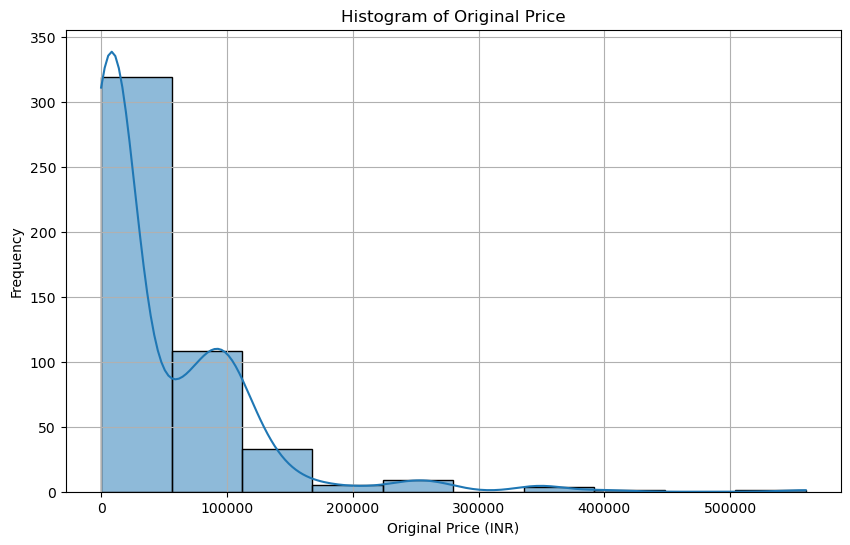

In [36]:
#Original price
plt.figure(figsize=(10, 6))

sns.histplot(data1['Original_price'], kde=True, bins=10)
plt.title('Histogram of Original Price')
plt.xlabel('Original Price (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Observation

+ It is positively skewed it means most of the data points are concentrated on the left side.
+ The frequency range of original prices appears around the lowwer end of the price range(i.e 100,000 INR)
+ Based on the plot the frequency sharply decreases,which means there is a higher concentration of lower-priced items

## pixels

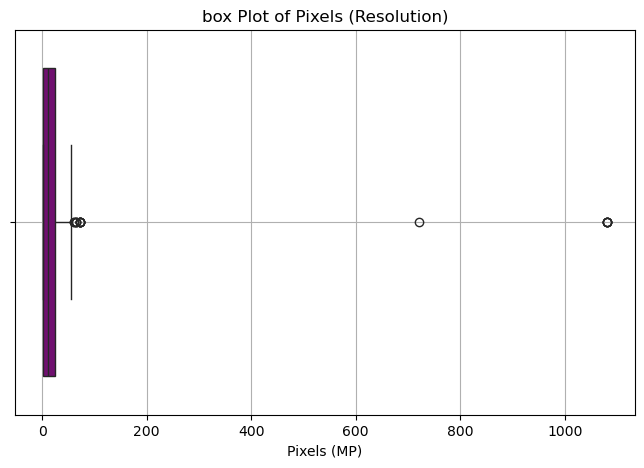

In [39]:
#Pixels
plt.figure(figsize=(8, 5))
sns.boxplot(x=data1['Pixels'], color='purple')
plt.title('box Plot of Pixels (Resolution)')
plt.xlabel('Pixels (MP)')
plt.grid(True)
plt.show()

## Observation
+ Most of the data is concentrated near the lower end of the pixel resolution scale,likely below 200 MP,very few outliers are extended upto 1000 MP.
+ The box and whiskers are clustered tightly below the range of 200 Mp.
+ It means most of the data is having lowest pixel resolution

## Discount Price

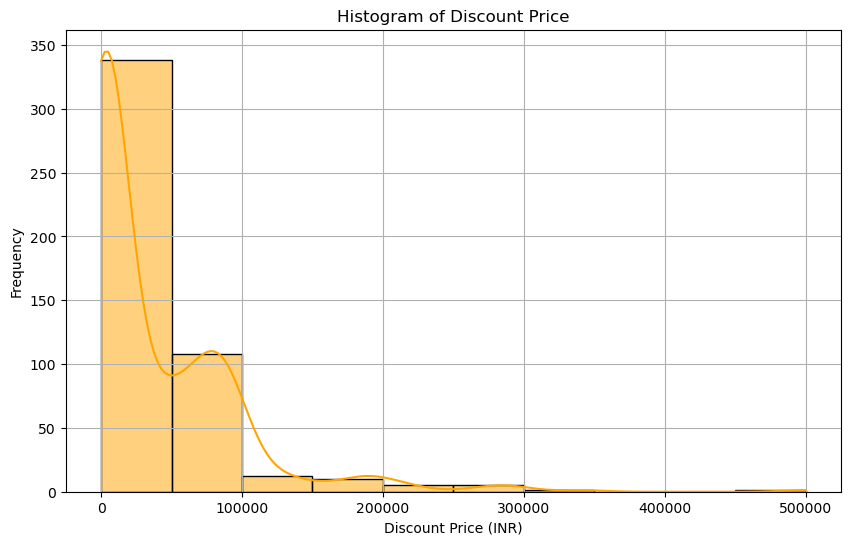

In [42]:
#Discount price
plt.figure(figsize=(10, 6))
sns.histplot(data1['Discount_price'], kde=True, color='orange', bins=10)
plt.title('Histogram of Discount Price')
plt.xlabel('Discount Price (INR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Observation
+ It is positively skewed it means most of the data points are concentrated on the left side.
+ The frequency range of original prices appears around the lowwer end of the price range(i.e 100,000 INR)
+ Based on the plot the frequency sharply decreases,which means there is a higher concentration of lower-priced items

## Ratings

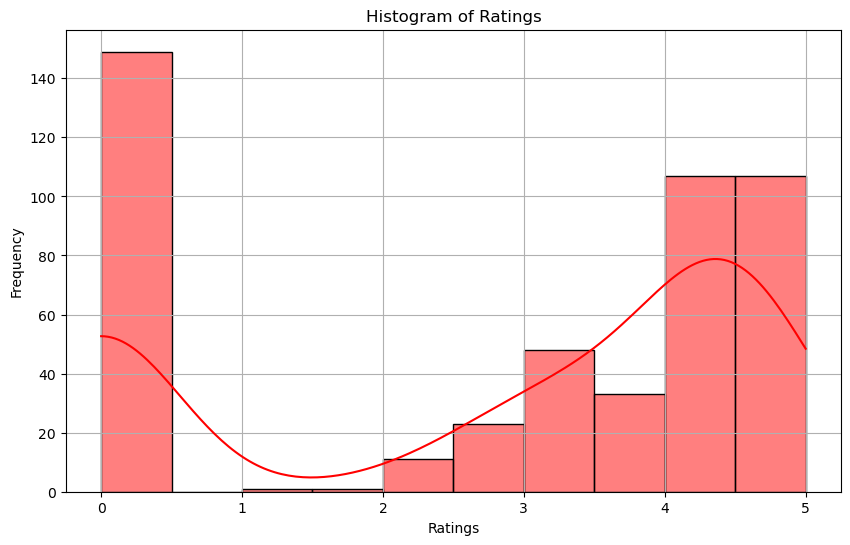

In [45]:
#Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data1['Ratings'], kde=True, color='red', bins=10)
plt.title('Histogram of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Observation
+ The Highest frequency is seen at the rating ) with 120 occurrences,this suggests that a significant no.of items recieved no ratings at all.
+ The Frequency of ratings picks up again towards the higher end,particularly at ratings of 4 and 5 have around 60 to 100 occurrences each.
+ The distribution apppears bimodal,with peaks at 0 and 4,5. This could suggest a polarization where most of the items either recieve no rating or highly rated.

## Wifi Connectivity

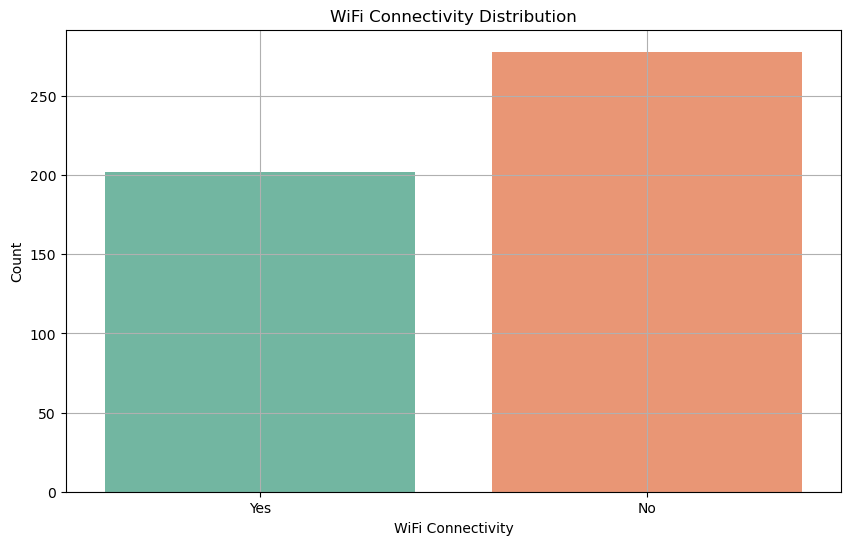

In [48]:
#Wifi connectivity
plt.figure(figsize=(10, 6))
sns.countplot(x='WiFi Connectivity', data=data1, palette='Set2')
plt.title('WiFi Connectivity Distribution')
plt.xlabel('WiFi Connectivity')
plt.ylabel('Count')
plt.grid(True)
plt.show();


# Observation
+ The bar chart compares wifi connectivity
+ The bar chart for yes is shorter i.e few of the cameras are having the wifi connectivity.
+ The bar chart for no is taller i.e most of the cameras are not having the wifi connectivity.              

## Brand

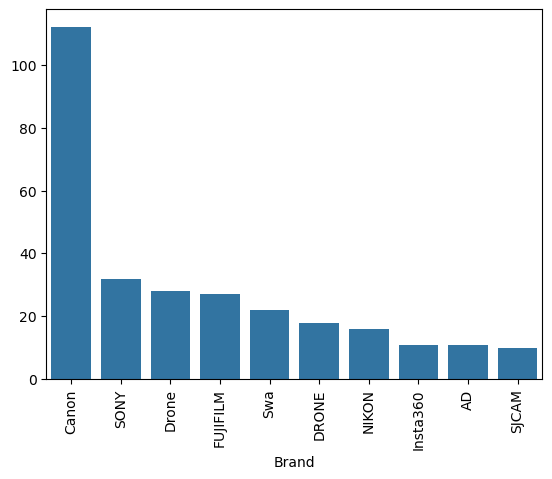

In [51]:
#Brand
sns.barplot(x = data1.Brand.value_counts().nlargest(10).index,y = data1.Brand.value_counts().nlargest(10).values)
plt.xticks(rotation = 90)

plt.show();

# Observation
+ This shows the top 10 cameras in the data
+ Canon,Fujifilm,Sony,Mugo,Drone these are the top 5 cameras based on sales in the data
+ There is a noticeable gap between Canon and the other brands, suggesting Canon’s value is significantly higher.


## Cameras count

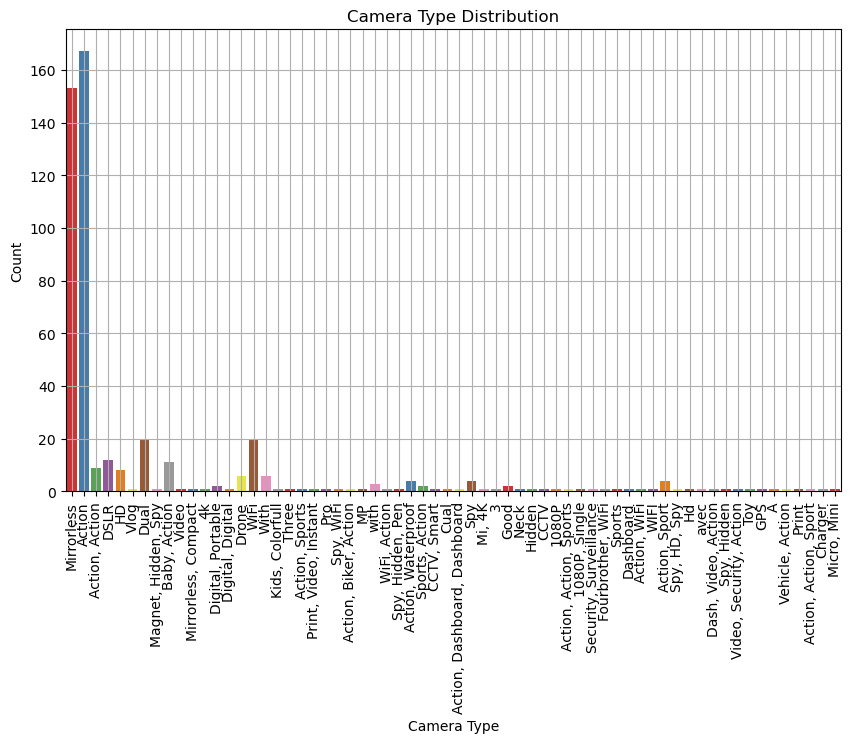

In [54]:
#Camera
plt.figure(figsize=(10, 6))
sns.countplot(x='Camera', data=data1, palette='Set1')
plt.title('Camera Type Distribution')
plt.xlabel('Camera Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# Observation
+ The first two bars (green and red) are significantly taller than the others, indicating much higher values for these categories.
+ The remaining bars vary in height, showing a wide range of values across different categories.
+ There is a small inset graph in the top right corner, possibly for closer inspection or comparison of specific data points.

## Brands with highest number of cameras

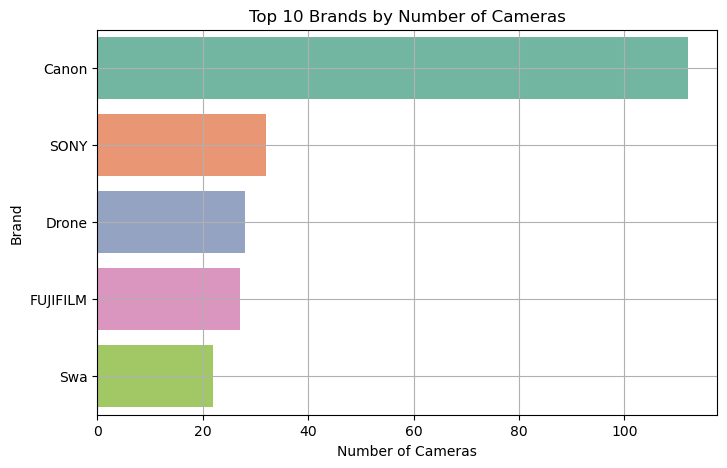

In [57]:
# Count the number of cameras by brand
brand_counts = data1['Brand'].value_counts().nlargest(5).index

# Filter to include only top 10 brands by number of cameras
filtered_data = data1[data1['Brand'].isin(brand_counts)]

# Plot the count of cameras for top 10 brands
plt.figure(figsize=(8, 5))
sns.countplot(data=filtered_data, y='Brand', order=filtered_data['Brand'].value_counts().index, palette='Set2')
plt.title('Top 10 Brands by Number of Cameras')
plt.xlabel('Number of Cameras')
plt.ylabel('Brand')
plt.grid(True)
plt.show()


# observation
+ The brands at the bottom of the graph have the longest bars, indicating they have the highest number of cameras.
+ The brands at the top have shorter bars, showing fewer cameras.
+ This graph effectively highlights the differences in camera counts among the brands, making it easy to compare their prevalence.

## pixel count vs Ratings

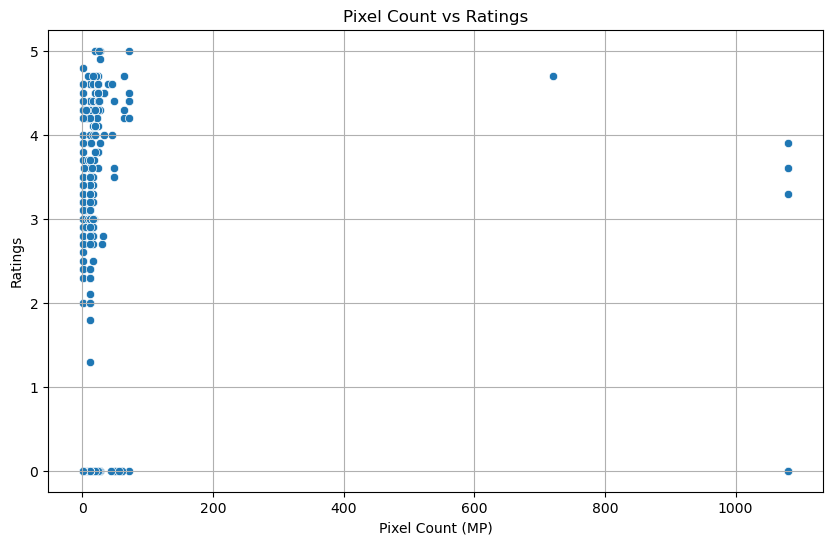

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pixels', y='Ratings', data=data1,  palette='Set2')
plt.title('Pixel Count vs Ratings')
plt.xlabel('Pixel Count (MP)')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

# observation
+ Most data points are clustered at the lower end of the pixel count (near 0-200 MP) with high ratings (around 4-5).
+ There are a few outliers with higher pixel counts (up to 1000 MP) and varying ratings (1-4)
+ The majority of high ratings are associated with lower pixel counts, suggesting that higher pixel count does not necessarily correlate with higher ratings.

## Pixel count vs Discount price

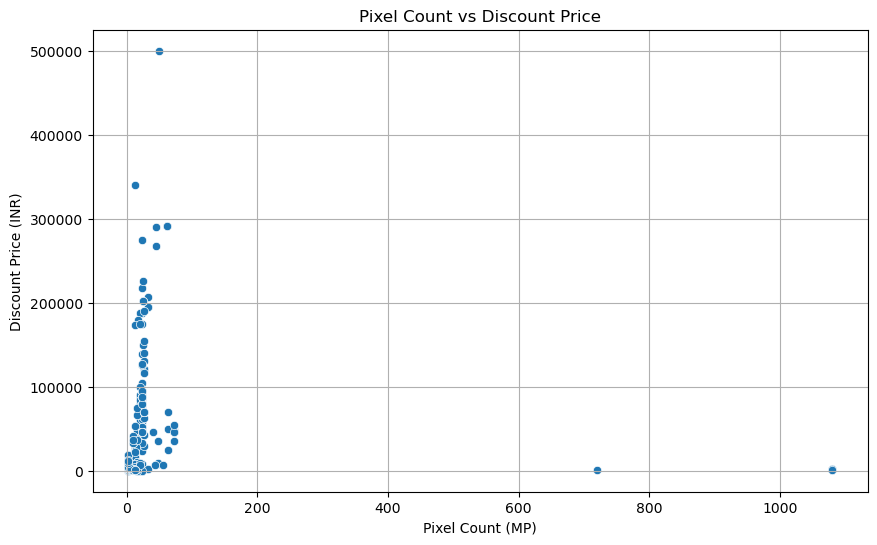

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pixels', y='Discount_price', data=data1, palette='Set2')
plt.title('Pixel Count vs Discount Price')
plt.xlabel('Pixel Count (MP)')
plt.ylabel('Discount Price (INR)')
plt.grid(True)
plt.show()

# observation
+ Most data points are clustered at the lower end of both axes, indicating that cameras with lower pixel counts tend to have lower discount prices
+ There are a few data points with higher pixel counts and discount prices, but they are sparse compared to the cluster at the bottom.
+ The majority of cameras with higher pixel counts do not necessarily have proportionally higher discount prices

##  count ofBrand 

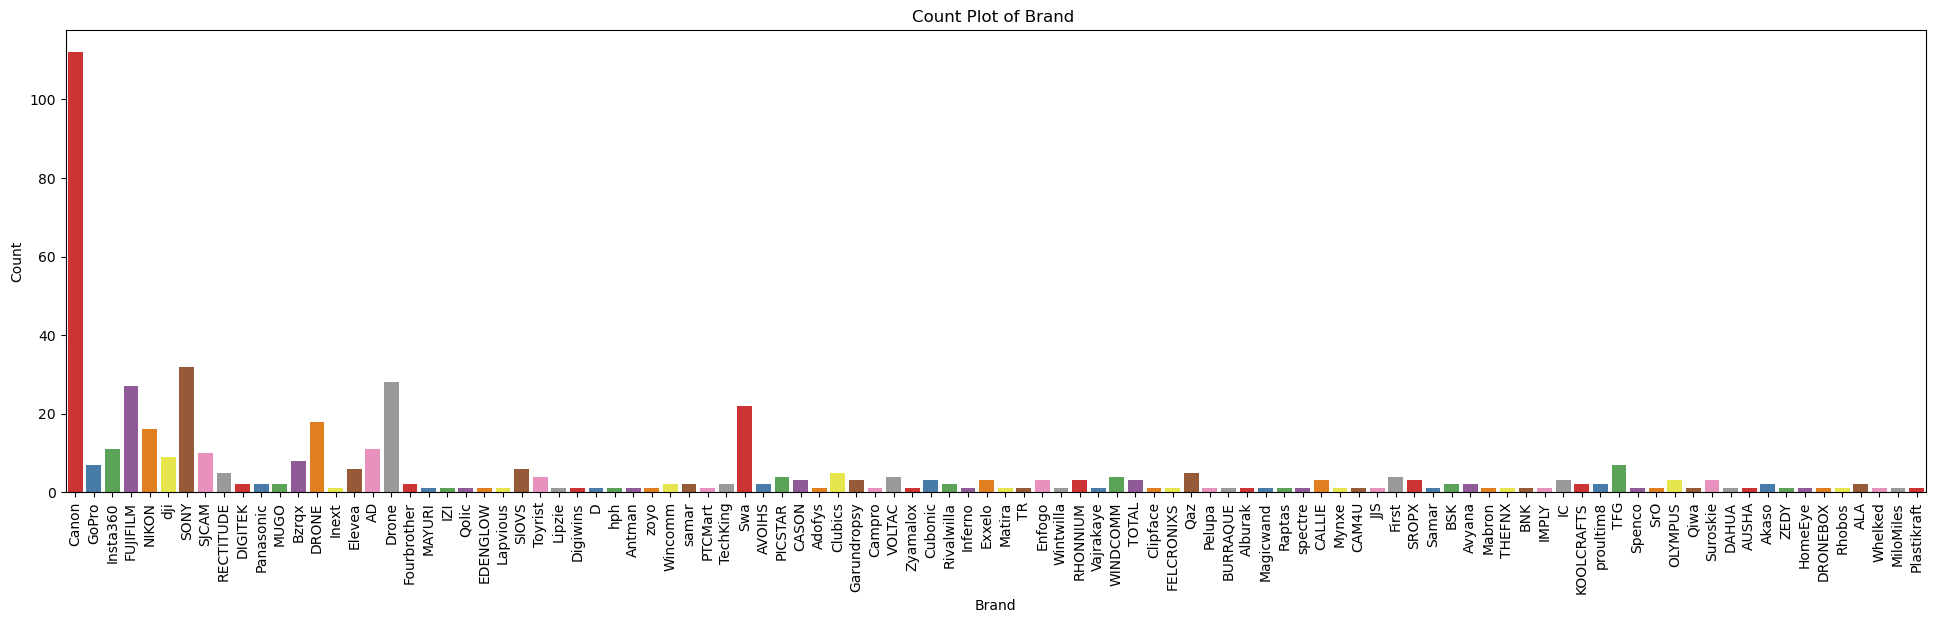

In [66]:
#Brand
plt.figure(figsize=(24, 6))#univariate
sns.countplot(data=data1, x='Brand', palette='Set1')
plt.title('Count Plot of Brand ')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# observation
+ Canon has the highest count, indicating it is the most prevalent brand.
+  Other brands like Insta 360, GoPro, and SONY also have significant counts but are lower than Canon.
+  The graph includes a wide range of brands, showing a diverse market presence.

## Pixels vs Discount

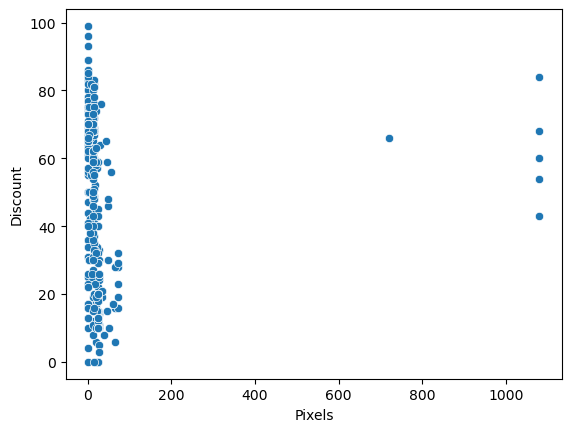

In [69]:
#Pixels vs Discount
sns.scatterplot(x=data1['Pixels'],
               y=data1['Discount'])
plt.show()

# observation
+ Most data points are concentrated at the lower end of the ‘Pixels’ axis, indicating that lower pixel counts are more common.
+ The data points spread out more along the ‘Discount’ axis, suggesting a wider range of discount percentages.
+ There are a few data points with higher pixel counts and varying discounts, but they are sparse compared to the main cluster.

## Brand vs Ratings

In [72]:
#Brand vs Ratings
Brands=data1[['Brand','Ratings']].sort_values(by='Ratings',ascending=False).head(50)

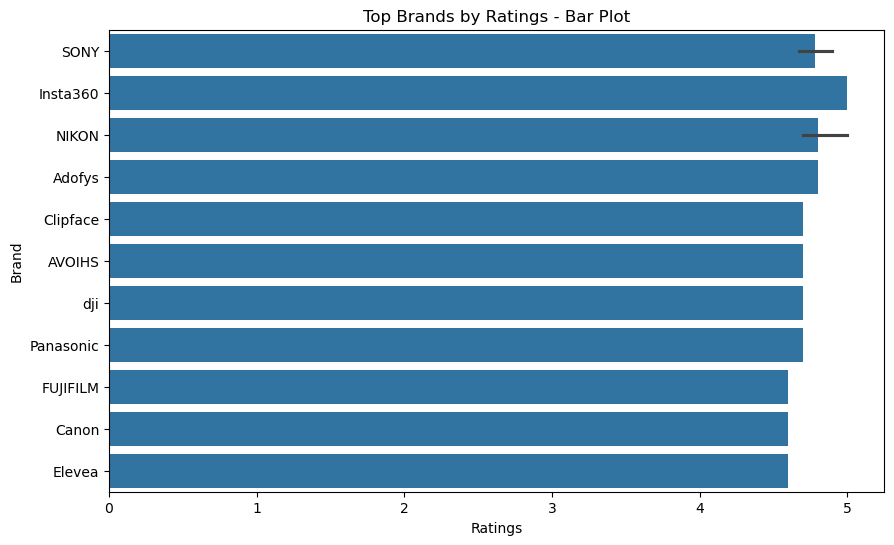

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x='Ratings',y='Brand', data=Brands)
plt.xticks(rotation=0)
plt.title('Top Brands by Ratings - Bar Plot')
plt.show();


## observation
+ Insta360 has the Highest Rating
+ Nikon,sony are having  second highest Ratings

## Camera with Highest Ratings 

In [76]:
Brands=data1[['Camera','Ratings']].sort_values(by='Ratings',ascending=False).head(50)

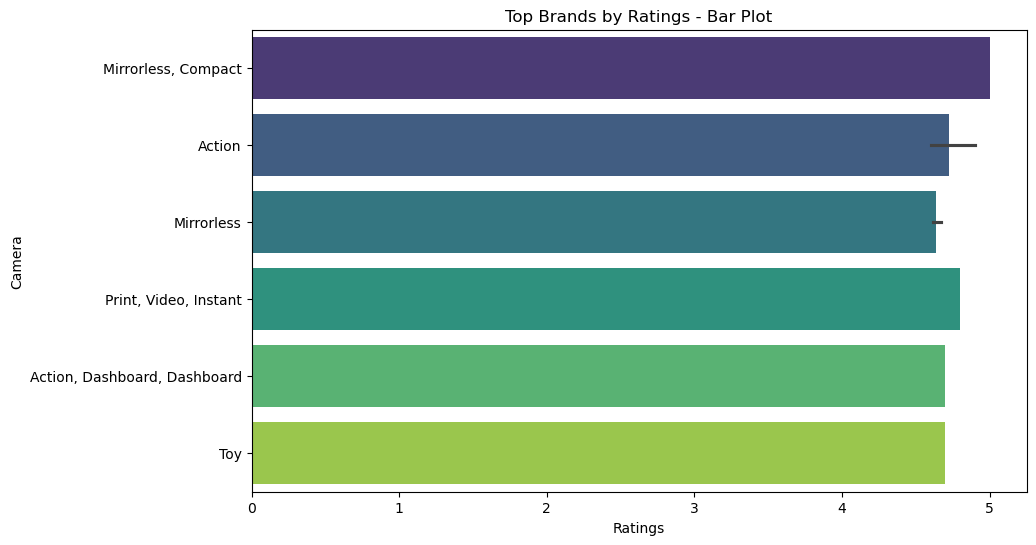

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x='Ratings',y='Camera', data=Brands, palette='viridis')
plt.xticks(rotation=0)
plt.title('Top Brands by Ratings - Bar Plot')
plt.show();


## multivariate Analysis

<Axes: >

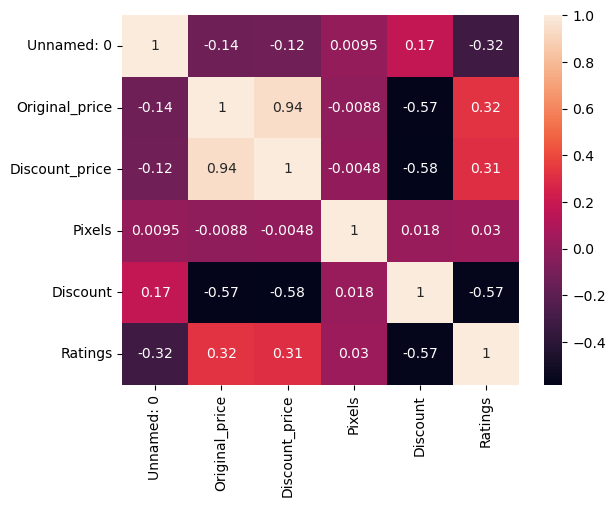

In [79]:
#Heatmap
sns.heatmap(data1.select_dtypes(include='number').corr(),annot=True)

# observation
+ Darker shades indicate stronger correlations, either positive or negative.
+ The diagonal line from the top left to the bottom right represents perfect correlations (correlation of 1) between the same variables.
+ The matrix helps identify which variables have strong relationships, useful for further analysis.

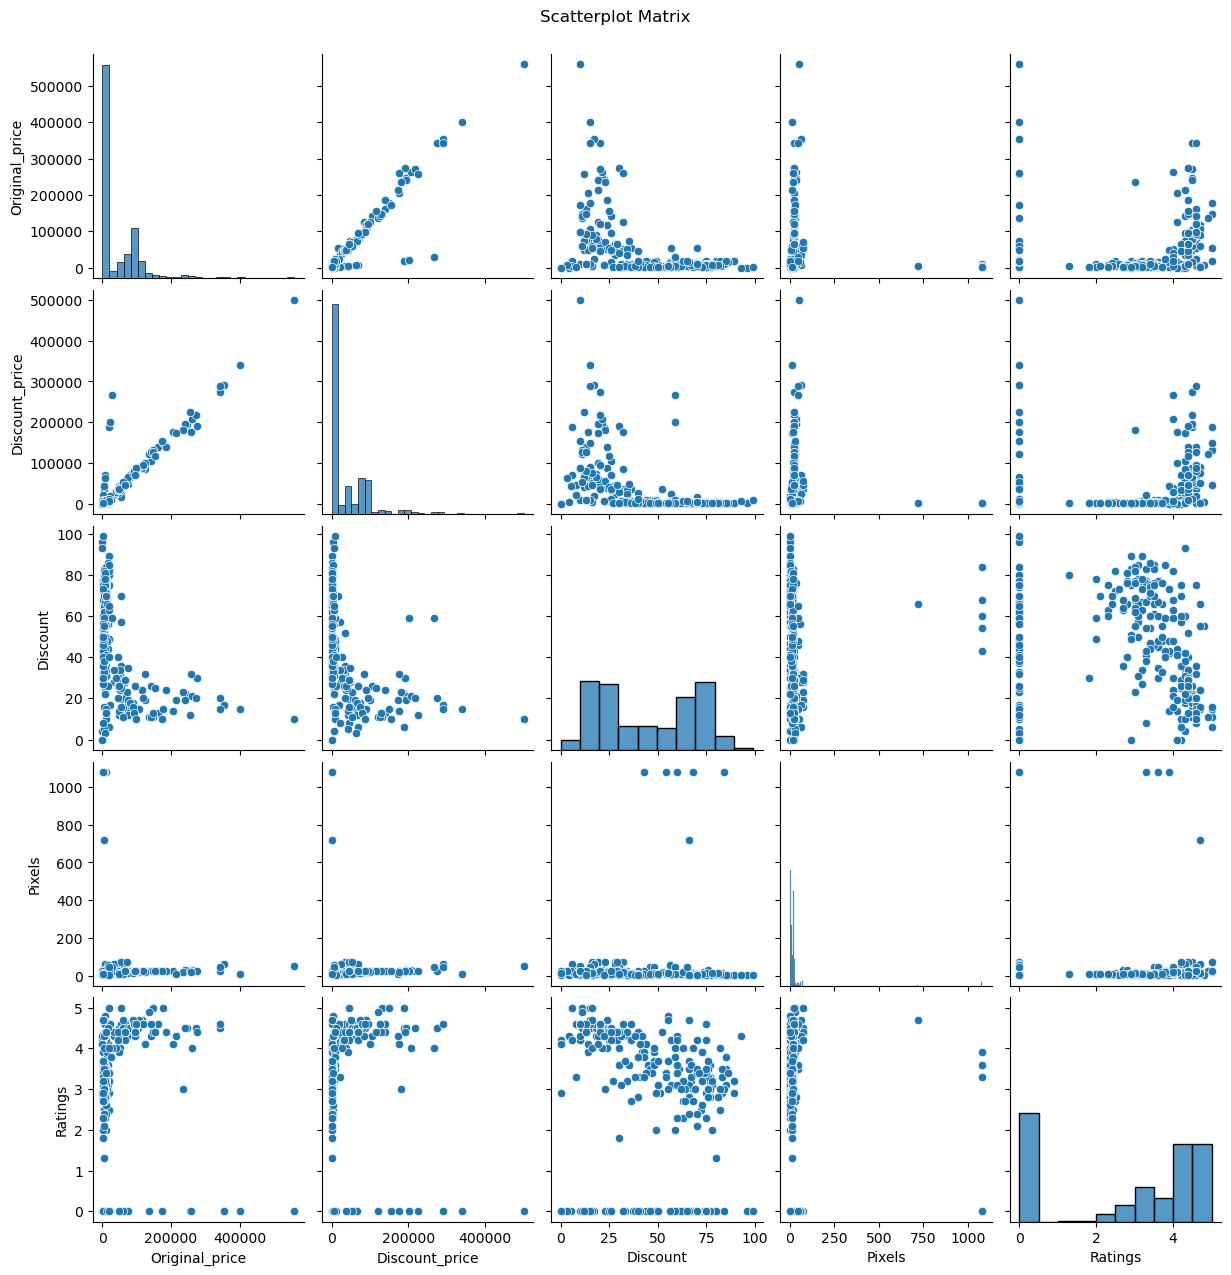

In [81]:
numeric_cols = ['Original_price', 'Discount_price','Discount', 'Pixels', 'Ratings']
sns.pairplot(data1[numeric_cols])
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()


# observation
+ Each scatterplot reveals the correlation between two variables, helping to identify potential relationships.
+ The histograms on the diagonal represent the distribution of each variable, providing insights into their spread and central tendency.
+ The scatterplots can help spot trends and outliers across the variables, useful for deeper analysis.

## Conclusion
+ from the above data I conclude that first we have done web scrapping and also web cleaning.

+ At next we have started plotting i.e we starts with an univariate plotting.

+ In univariate plotting we have done the plotting on all columns,we have original price, discount price, pixels, ratings and wifi connectivity etc...

+ next we have done bivariate analysis or plotting

In that we have done the relation between 1.pixel count vs ratings 2.pixel count vs Discount price 3.pixel vs Discount 4.Brand vs Ratings 5.camera vs ratings there by each analysis we found how it relates to each other column.

+ At last we have done multi variate analysis on all the numeric columns.

+ BASED ON THE RATINGS NIKON ,ELEVEA, ADOFYS IS THE TOP BRAND
+ BASED ON THE CAMERA TYPE THE TOP MOST CAMERA TYPE PEOPLE USED TO PREFER IS INSTANT CAMERA. 